In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('../EDA/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Get to know the "Sale Price", analyze it! 


In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

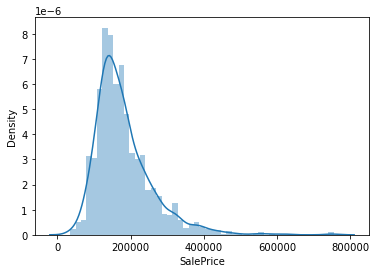

In [6]:
sns.distplot(df_train['SalePrice'])

- normal distribution
- positive skewness

In [7]:
print("skewness: %f" %df_train['SalePrice'].skew())
print("kurtosis: %f" %df_train['SalePrice'].kurt())

skewness: 1.882876
kurtosis: 6.536282


- nilai skewness : 
                   positif = nilai distribusi terbanyak di nilai rendah
                   negatif = nilai distribusi terbanyak di nilai tinggi
                   0       = bentuk simetris
- nilai kurtosis : 
                   >3 = ujung kurva berbentuk runcing
                   <3 = ujung kurva landai
                   3  = kurva berdistribusi normal

skewness dan kurtosis untuk melihat bagaimana persebaran distribusi data, jika skewness 0 dan kurtosis 3 maka distribusi data normal

# Let's take a look the relation between numerical variable (subjectively)

   SalePrice  GrLivArea
0     208500       1710
1     181500       1262
2     223500       1786
3     140000       1717
4     250000       2198


AxesSubplot(0.125,0.125;0.775x0.755)


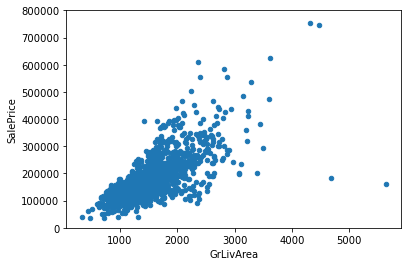

In [8]:
var = 'GrLivArea'
data = pd.concat ([df_train['SalePrice'],df_train[var]],axis = 1)
print (data.head())
print('\n')
print(data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000)))

frow the scatter plot above, we know that  GrLivArea impact the SalePrice, wider = expensive
so the conclusion is the SalePrice and GrLivArea Related

now, take a look between basement and saleprice

AxesSubplot(0.125,0.125;0.775x0.755)


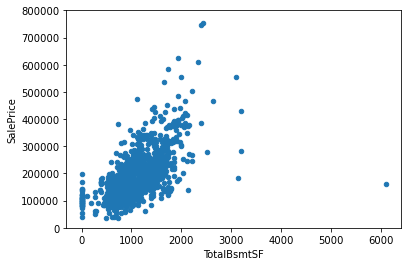

In [9]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'],df_train[var]], axis = 1)
print(data.plot.scatter(x = var, y = 'SalePrice', ylim =(0,800000)))

The same result with GrLivArea

# Analyzing the relation between the categorical variable (subjectively)

In [10]:
df_train["OverallQual"].head()

0    7
1    6
2    7
3    7
4    8
Name: OverallQual, dtype: int64

   SalePrice  OverallQual
0     208500            7
1     181500            6
2     223500            7
3     140000            7
4     250000            8


(-0.5, 9.5, 0.0, 800000.0)


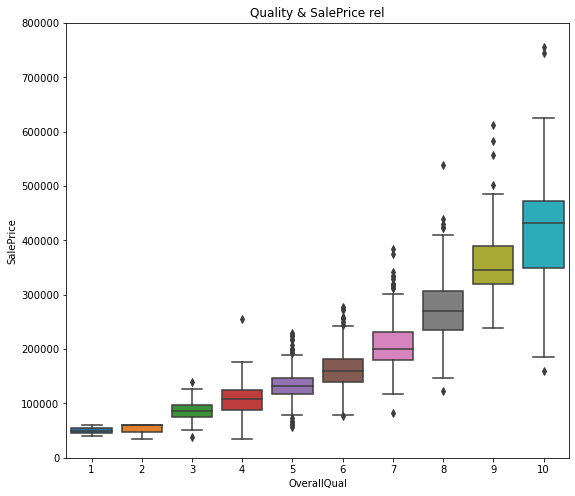

In [11]:
var = "OverallQual"
data = pd.concat ([df_train["SalePrice"],df_train[var]],axis = 1)
fig , ax = plt.subplots (figsize =(9,8))
fig = sns.boxplot(x = var , y = 'SalePrice', data = data )
ax.set_title('Quality & SalePrice rel')
print(data.head())
print('\n')
print (fig.axis(ymin = 0, ymax = 800000))


<b>contoh diagram box-plot</b>

Cara baca :
1. garis tengah kotak = median atau nilai tengah
2. ujung kotak = quartil atas & bawah
3. titik diluar garis = outlier ( data yang berbeda jauh/anomali) >3/2 garis tinggi atau lebih rendah
4. garis horizontal = nilai minimum dan maksimum setelah outlier dikeluarkan ( < 3/2 garis tengah)

misal nilai OverallQual 10 :
1. median sekitar 400000
2. harga paling tinggi sekitar 470000 dan paling rendah 330000
3. terdapat 1 nilai anomali di nilai min, dan 2 di nilai maks ( data > 1,5 median)
4. nilai minimum 180000 dan maks 650000

<b>analyze the relation between YearBuilt and SalePrice</b>

Text(0.5, 1.0, ' Year built and Sale price')

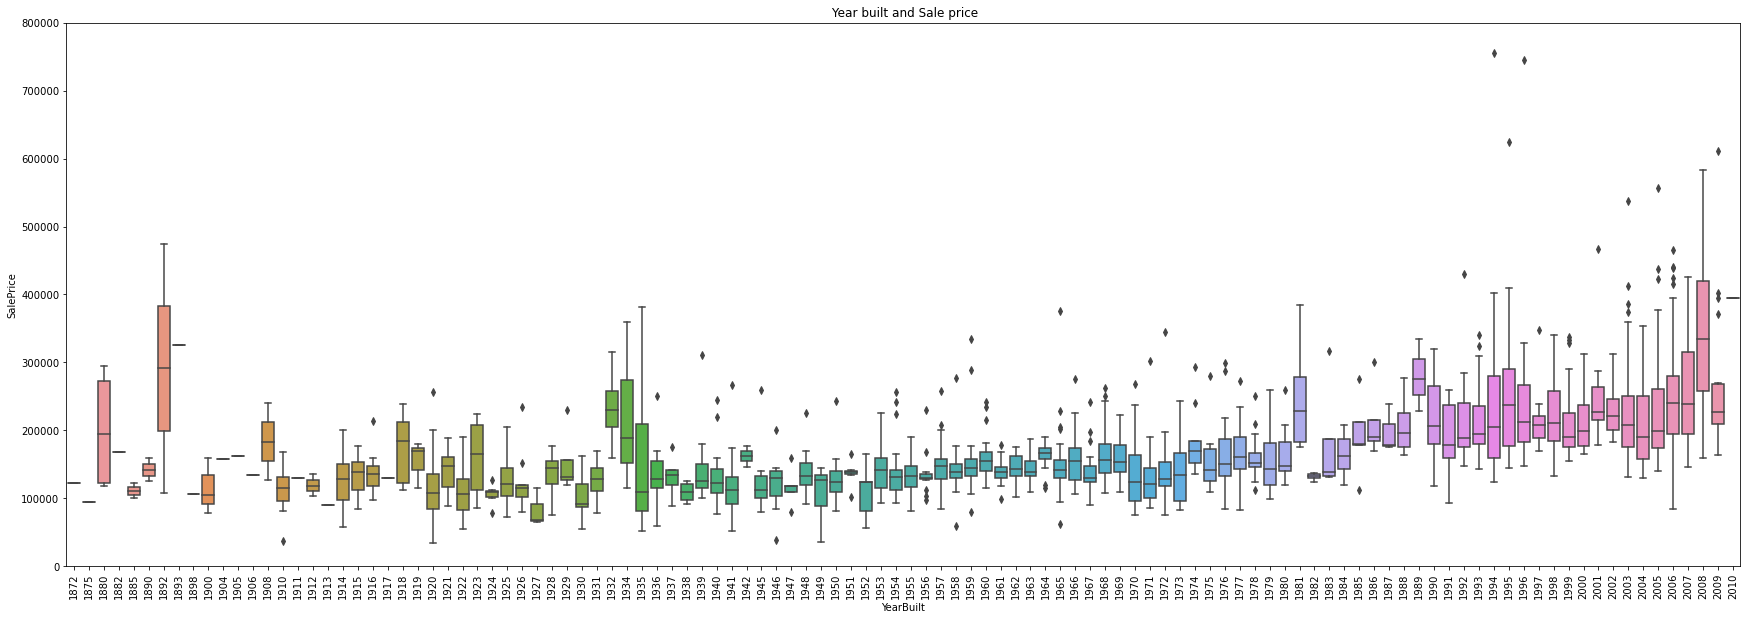

In [12]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis = 1)
fig , ax =plt.subplots (figsize = (30,10))
fig = sns.boxplot(x = var , y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)
plt.xticks(rotation = 90)
ax.set_title(" Year built and Sale price")


altough there is no strong tendency, sale price tend to higher on younger year than older. 

# Summary 
1. 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means   that   as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
<n> </n>
2. 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

# Correlation analysis (Objectively)

<AxesSubplot:>

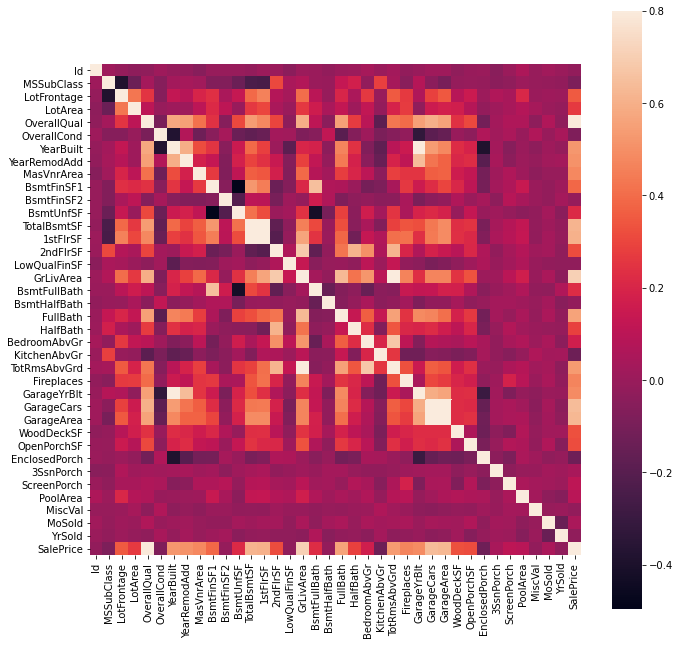

In [13]:
#correlation matrix
corrmat = df_train.corr()
f,ax = plt.subplots(figsize = (11,11))
sns.heatmap(corrmat, vmax=0.8, square = True)

based on heatmap above, we saw that the brighten colour indicate strong correlation between variables

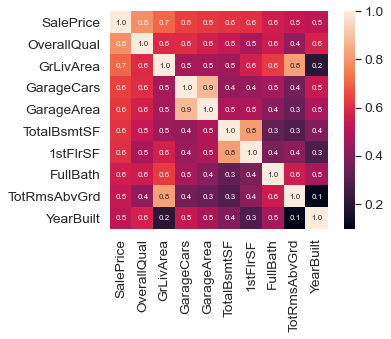

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


In [23]:
numvar = 10
cols = corrmat.nlargest(numvar, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt ='.1f', annot_kws = {'size':8}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

print(corrmat.nlargest(numvar,"SalePrice")['SalePrice'].index)

Sale price has very strong corr between OverallQual & GrLivArea and strong corr with GarageCars, GarageArea, TotalBsmtSF& 1stFlrSF.

YearBuilt has the weakest Correlation with SalePrice, it means :The historical data said Customer doesn't really care when the house was built.

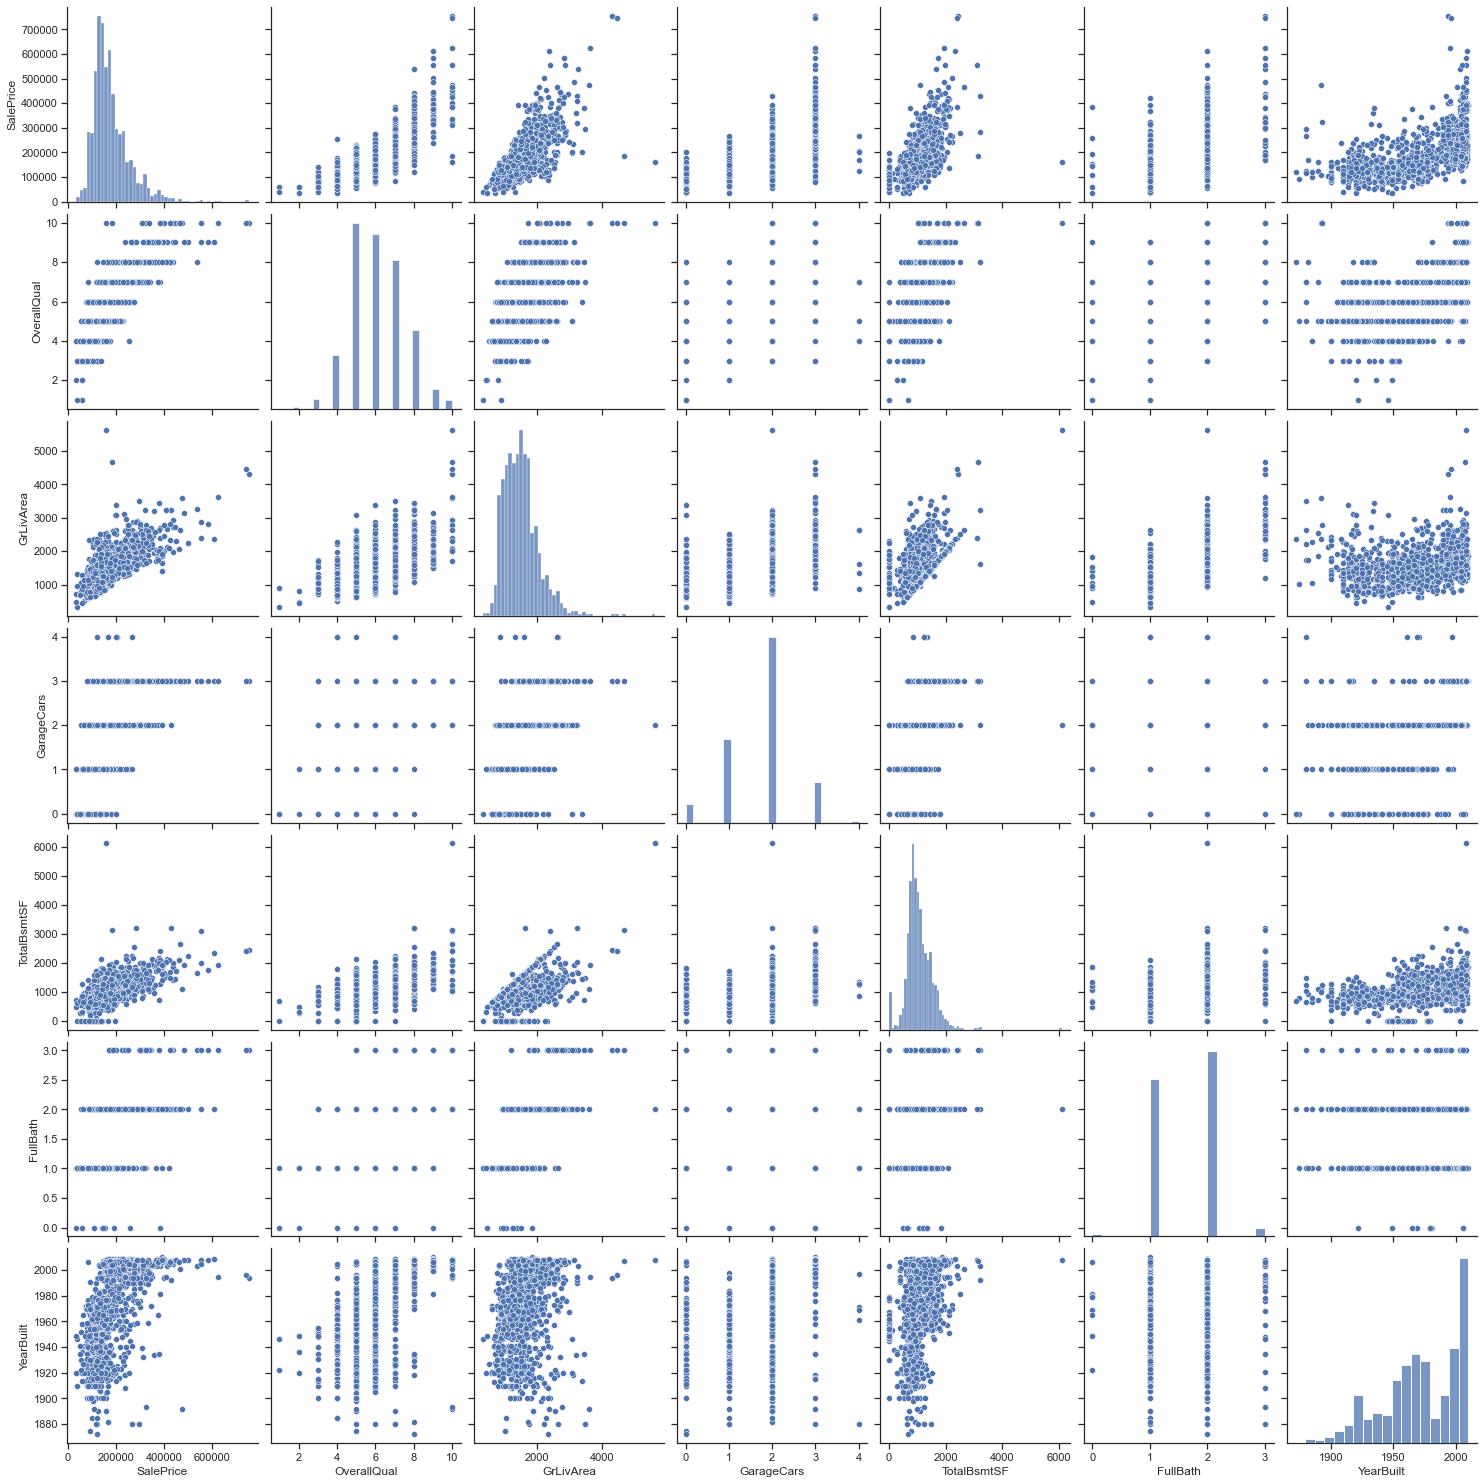

In [15]:
sns.set()
cols = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.set_theme(style="ticks")
sns.pairplot(df_train[cols], size = 3)
plt.show()

# Handle Missing Data

In [34]:
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat ([total,percent], axis = 1 , keys =['total','percent'])
missing_data.head(5)

,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603


the missing data could reduce our accuracy, and the top 5 isn't important based on corrmatrix. we're not gonna miss them. bye!

In [ ]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

In [43]:
df_train.isnull().sum().max()

0

the unused data is goneeeeeeee, see u~

# GET "OUT LIA(E)RS" !!!!!!
Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots.

<b> Univariate Analysis </b>

In [46]:
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


In [ ]:
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
tes =  StandardScaler()